In [1]:
from platform import python_version
print(python_version()) # tested with 3.7.1
# this adds the python wrapper module directory to the path.
import os
import sys
import numpy as np
import importlib
bindingspath = os.getcwd() + '/../build/python'
sys.path.append(bindingspath)
print(sys.path)

3.7.1
['/home/adria/Documents/Documents/TUM/dlfs/libdl/python', '/home/adria/anaconda3/lib/python37.zip', '/home/adria/anaconda3/lib/python3.7', '/home/adria/anaconda3/lib/python3.7/lib-dynload', '', '/home/adria/anaconda3/lib/python3.7/site-packages', '/home/adria/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/adria/.ipython', '/home/adria/Documents/Documents/TUM/dlfs/libdl/python/../build/python']


In [2]:
# The library wrapper
import pybindings as pyb

In [3]:
# Load Mnist
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
mnist = fetch_openml('mnist_784', version=1, cache=True)
trX, teX, trY, teY = train_test_split(mnist.data / 255.0, mnist.target.astype("int0"), test_size = 0.33)

# Data vectors are expected in columns
trX = trX.transpose();
teX = teX.transpose();

In [4]:
# dataset properties
print("Values per Image:", trX.shape[0])
print("Number of images for training:", trX.shape[1])
print("Number of images for testing:", teX.shape[1])
print("--- ---")

Values per Image: 784
Number of images for training: 46900
Number of images for testing: 23100
--- ---


In [5]:
from matplotlib import pyplot as plt
%matplotlib inline 
from skimage import io
#im = io.imread(os.getcwd() + '/data/train-volume.tif')
#print(im.shape)
#ims = np.reshape(im, (30, 512 * 512)).transpose() 
#print(ims.shape)

#someimg = ims[:,2],(512,512);

#plt.title("some img")
#plt.imshow(np.reshape(ims[:,2],(512,512)), interpolation='nearest', cmap='gray')
#plt.show()

In [6]:
#subsample if necessary
trainSampleSize = 1;
trXSub = trX[:,0:trainSampleSize]
testSampleSize = 1;
teXSub = teX[:,0:testSampleSize]
print("Values per Image:", trXSub.shape[0])
print("Number of images for training:", trXSub.shape[1])
print("Number of images for testing:", teXSub.shape[1])

Values per Image: 784
Number of images for training: 1
Number of images for testing: 1


In [7]:
convOnly = pyb.AutoEncoderExample3(28,28,1,4)

this->mInputDims.Height:28 this->mInputDims.Width:28 this->mOutputDims.Height: 28 this->mOutputDims.Width: 28
this->mInputDims.Height:28 this->mInputDims.Width:28 this->mOutputDims.Height: 28 this->mOutputDims.Width: 28


In [8]:
convOnly.Train(trXSub,trXSub,0.0001,100)

GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0537632
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0281219
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0260161
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0272549
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.026237
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0218219
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0172757
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0151091
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0132158
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0113606
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.00943322
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.00786925
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.00676796
GetLoss(): ++++++++++++++++++++++++++++++++++++++

testing:
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.00151348


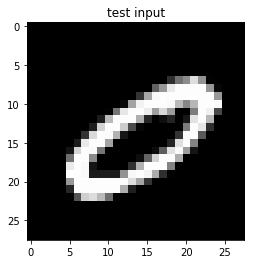

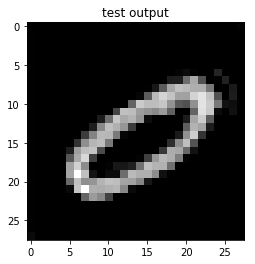

In [9]:
convOnlyOut= convOnly.Test(trXSub)
plt.title("test input")
plt.imshow(np.reshape(trXSub,(28,28)), interpolation='nearest', cmap='gray')
plt.show()
plt.title("test output")
plt.imshow(np.reshape(convOnlyOut,(28,28)), interpolation='nearest', cmap='gray')
plt.show()

In [10]:
convOnlyOut

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02090732],
       [0.00852437],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [11]:
unetSimpl = pyb.AutoEncoderExample2(28,28,1,
                               3,3,3,3,3,3,3,3)

this->mInputDims.Height:28 this->mInputDims.Width:28 this->mOutputDims.Height: 26 this->mOutputDims.Width: 26
this->mInputDims.Height:26 this->mInputDims.Width:26 this->mOutputDims.Height: 24 this->mOutputDims.Width: 24
this->mInputDims.Height:24 this->mInputDims.Width:24 this->mOutputDims.Height: 22 this->mOutputDims.Width: 22
this->mInputDims.Height:22 this->mInputDims.Width:22 this->mOutputDims.Height: 20 this->mOutputDims.Width: 20
this->mInputDims.Height:20 this->mInputDims.Width:20 this->mOutputDims.Height: 18 this->mOutputDims.Width: 18
this->mInputDims.Height:18 this->mInputDims.Width:18 this->mOutputDims.Height: 16 this->mOutputDims.Width: 16
this->mInputDims.Height:16 this->mInputDims.Width:16 this->mOutputDims.Height: 14 this->mOutputDims.Width: 14
this->mInputDims.Height:14 this->mInputDims.Width:14 this->mOutputDims.Height: 12 this->mOutputDims.Width: 12
this->mInputDims.Height:12 this->mInputDims.Width:12 this->mOutputDims.Height: 14 this->mOutputDims.Width: 14
this->mInp

In [12]:
unetSimpl.Train(trXSub,trXSub,0.0001,10)

GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
43.2619
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0626958
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615196
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615196
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615196
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615196
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615196
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615196
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615196
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615196


testing:
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615196


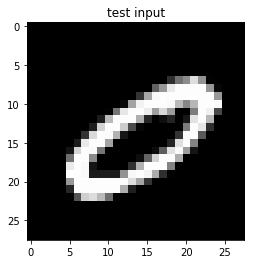

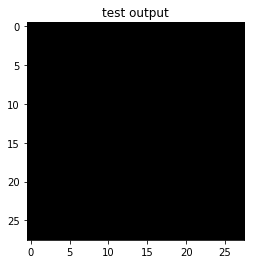

In [13]:
unetSimplOut = unetSimpl.Test(trXSub)
plt.title("test input")
plt.imshow(np.reshape(trXSub,(28,28)), interpolation='nearest', cmap='gray')
plt.show()
plt.title("test output")
plt.imshow(np.reshape(unetSimplOut,(28,28)), interpolation='nearest', cmap='gray')
plt.show()

In [14]:
unetSimplOut

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [23]:
oneEach = pyb.AutoEncoderExample4(28,28,1,1)

this->mInputDims.Height:28 this->mInputDims.Width:28 this->mOutputDims.Height: 26 this->mOutputDims.Width: 26
this->mInputDims.Height:26 this->mInputDims.Width:26 this->mOutputDims.Height: 28 this->mOutputDims.Width: 28


In [16]:
oneEach.Train(trXSub,trXSub,0.00001,1)

GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.497966


In [24]:
oneEachOut = oneEach.Test(trXSub)

testing:
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.651043


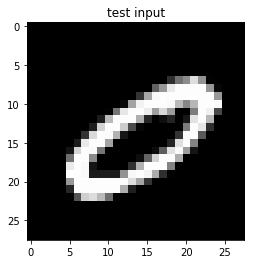

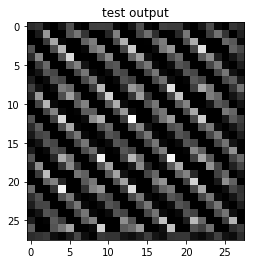

In [25]:
plt.title("test input")
plt.imshow(np.reshape(trXSub,(28,28)), interpolation='nearest', cmap='gray')
plt.show()
plt.title("test output")
plt.imshow(np.reshape(oneEachOut,(28,28)), interpolation='nearest', cmap='gray')
plt.show()

In [26]:
oneEachOut

array([[0.736173  ],
       [0.8504911 ],
       [0.13845996],
       [0.        ],
       [0.38994741],
       [1.29606349],
       [0.13862124],
       [0.        ],
       [1.02982061],
       [1.03847181],
       [1.02766694],
       [0.13596238],
       [0.        ],
       [0.38876597],
       [1.29962412],
       [0.13612451],
       [0.        ],
       [1.03198788],
       [0.99714643],
       [0.98739772],
       [0.18285544],
       [0.        ],
       [0.410948  ],
       [1.23277165],
       [0.18300172],
       [0.        ],
       [0.87266787],
       [0.7364377 ],
       [0.        ],
       [0.4347508 ],
       [2.42548533],
       [0.        ],
       [0.        ],
       [1.3086019 ],
       [1.87429039],
       [0.86167926],
       [0.        ],
       [0.        ],
       [0.6156251 ],
       [2.05738196],
       [0.        ],
       [0.        ],
       [1.08484481],
       [1.77967021],
       [0.77019481],
       [0.        ],
       [0.02096788],
       [0.666

In [20]:
# importlib.reload(pyb) # For some reason, this appears not to be working
# unet = pyb.AutoEncoderExample(28,28,1,
#                                12,36,
#                                5,3,
#                                0,0,
#                                1,1)

In [21]:
# unet.Train(trXSub,trXSub,0.0005,110)

In [22]:
# aa = unet.Test(trXSub)
# plt.title("test input")
# plt.imshow(np.reshape(trXSub,(28,28)), interpolation='nearest', cmap='gray')
# plt.show()
# plt.title("test output")
# plt.imshow(np.reshape(aa,(28,28)), interpolation='nearest', cmap='gray')
# plt.show()